In [21]:
!pip install yfinance
!pip install yahoofinancials
import pandas as pd 
import yfinance as yf
from yahoofinancials import YahooFinancials

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [22]:
!pip install prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [23]:
from prophet import Prophet

In [24]:
df = yf.download('BTC-USD', start='2016-12-08', end='2022-12-31', progress=False)
df = df.reset_index()
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-12-08,768.075989,774.697998,765.945984,770.809998,770.809998,80111904
1,2016-12-09,769.943970,774.528015,769.648987,772.794006,772.794006,68705296
2,2016-12-10,773.023010,777.091980,772.909973,774.650024,774.650024,53843100
3,2016-12-11,774.752014,774.797974,765.411987,769.731018,769.731018,57313400
4,2016-12-12,770.039978,781.921997,770.039978,780.086975,780.086975,76571000
...,...,...,...,...,...,...,...
2209,2022-12-26,16842.250000,16920.123047,16812.369141,16919.804688,16919.804688,11886957804
2210,2022-12-27,16919.291016,16959.845703,16642.072266,16717.173828,16717.173828,15748580239
2211,2022-12-28,16716.400391,16768.169922,16497.556641,16552.572266,16552.572266,17005713920
2212,2022-12-29,16552.322266,16651.755859,16508.683594,16642.341797,16642.341797,14472237479


In [25]:
df = df[['Date','Close']]
df = df.rename(columns={'Date':'ds','Close':'y'})
df.tail(10)

,ds,y
2204,2022-12-21,16817.535156
2205,2022-12-22,16830.341797
2206,2022-12-23,16796.953125
2207,2022-12-24,16847.755859
2208,2022-12-25,16841.986328
2209,2022-12-26,16919.804688
2210,2022-12-27,16717.173828
2211,2022-12-28,16552.572266
2212,2022-12-29,16642.341797
2213,2022-12-30,16602.585938


In [26]:
m = Prophet()
m.fit(df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [27]:
df = df[:-1]
df

,ds,y
0,2016-12-08,770.809998
1,2016-12-09,772.794006
2,2016-12-10,774.650024
3,2016-12-11,769.731018
4,2016-12-12,780.086975
...,...,...
2208,2022-12-25,16841.986328
2209,2022-12-26,16919.804688
2210,2022-12-27,16717.173828
2211,2022-12-28,16552.572266


In [28]:
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2016-12-08,-2049.477571,-6011.371883,3726.379586,-2049.477571,-2049.477571,839.839043,839.839043,839.839043,-21.265673,-21.265673,-21.265673,861.104716,861.104716,861.104716,0.0,0.0,0.0,-1209.638528
1,2016-12-09,-2019.541100,-5839.581946,3426.551706,-2019.541100,-2019.541100,848.015406,848.015406,848.015406,-9.983493,-9.983493,-9.983493,857.998899,857.998899,857.998899,0.0,0.0,0.0,-1171.525694
2,2016-12-10,-1989.604629,-6277.069631,3613.195958,-1989.604629,-1989.604629,867.834870,867.834870,867.834870,7.898642,7.898642,7.898642,859.936229,859.936229,859.936229,0.0,0.0,0.0,-1121.769759
3,2016-12-11,-1959.668158,-6263.510096,3777.721759,-1959.668158,-1959.668158,861.801983,861.801983,861.801983,-5.937217,-5.937217,-5.937217,867.739200,867.739200,867.739200,0.0,0.0,0.0,-1097.866175
4,2016-12-12,-1929.731687,-5833.862437,4019.814065,-1929.731687,-1929.731687,896.710038,896.710038,896.710038,14.528971,14.528971,14.528971,882.181067,882.181067,882.181067,0.0,0.0,0.0,-1033.021649


In [29]:
from prophet import Prophet
from matplotlib import pyplot as pd

In [30]:
future.tail()

,ds
2574,2023-12-26
2575,2023-12-27
2576,2023-12-28
2577,2023-12-29
2578,2023-12-30


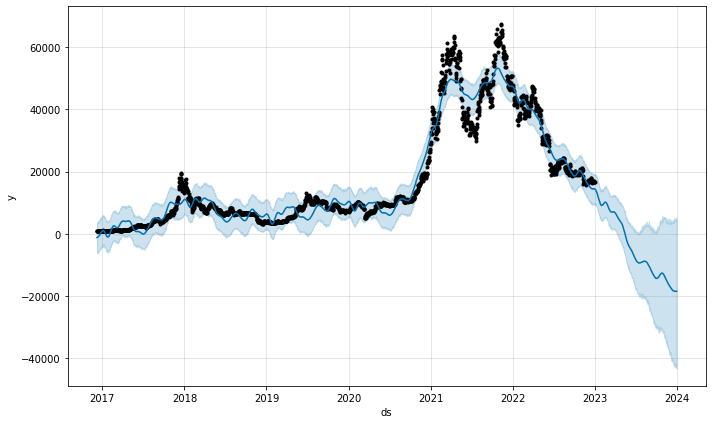

In [31]:
plot1 = m.plot(forecast)